# Four stages of Data Science Pipeline
1. Sourcing and loading
2. Cleaning, transforming, and visualizing
3. Modeling
4. Evaluating and concluding

##  In this case study, I'll apply machine learning algorithms for predicting haploid rate 

# Sourcing and loading

# 1.1. Importing Libraries

In [1]:
# import libraries 
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# 1.2. Loading the data

In [2]:
data=pd.read_csv('C:/Users/gellima/Desktop/Springboard_DScience/Data_Sci_Inhouse/data_wrangled2.csv')
# The dataset we're interested in contains haploids production 

In [3]:
# gets first few rows of dataframe
data.head()

,Request_id,GE_ID,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


## 1.2.1 Data Definition

In [4]:
# column names of the dataset
data.columns

Index(['Request_id', 'GE_ID', 'Site', 'Year', 'Quarter', 'BreedingZone',
       'EvaluationZone', 'HetGrp', 'Type', 'Actual_embryos',
       'Actual_haploid_embryos', 'Hap_rate', 'Actual_Elle_pots',
       'Actual_D0_plants', 'Trans_rate', 'Actual_D0_poll', 'Poll_rate'],
      dtype='object')

In [5]:
# change year and quarter column type to object
data['Year'] = data['Year'].astype(object)
data['Quarter'] = data['Quarter'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Request_id              14811 non-null  int64  
 1   GE_ID                   14811 non-null  int64  
 2   Site                    14811 non-null  object 
 3   Year                    14811 non-null  object 
 4   Quarter                 14811 non-null  object 
 5   BreedingZone            14811 non-null  object 
 6   EvaluationZone          14811 non-null  object 
 7   HetGrp                  14811 non-null  object 
 8   Type                    14811 non-null  object 
 9   Actual_embryos          14811 non-null  int64  
 10  Actual_haploid_embryos  14811 non-null  int64  
 11  Hap_rate                14811 non-null  int64  
 12  Actual_Elle_pots        14811 non-null  float64
 13  Actual_D0_plants        14811 non-null  float64
 14  Trans_rate              14811 non-null

In [6]:
# set Request_id,GE_ID columns as index since they have unique values
data.set_index(['Request_id','GE_ID'], inplace=True)
data.head()

,,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
Request_id,GE_ID,,,,,,,,,,,,,,,
178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


# 3. Exploratory Data analysis
familiar with the features of your dataset, investigate the relationships between features

# 3.1 Categorical Features/ EDA for categorical variables

In [7]:
#Use 'select_dtypes` method to select columns of dtype 'object'
cat_fea=data.select_dtypes('object').copy()
cat_fea.head()


,,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type
Request_id,GE_ID,,,,,,,
178950,67133087,AZ,2015,1,TE,NAWN,SSS,S
178955,67133419,AZ,2015,1,TE,NAWN,SSS,S
178969,67226512,AZ,2015,1,TE,NAWN,NSS,O
178971,67226501,AZ,2015,1,TE,NAWN,NSS,O
178973,67226717,AZ,2015,1,TE,NAWN,NSS,O


In [8]:
cat_fea.columns

Index(['Site', 'Year', 'Quarter', 'BreedingZone', 'EvaluationZone', 'HetGrp',
       'Type'],
      dtype='object')

## 3.1.1 Basic Stats for each catogorical feature

Get the stats using function

In [9]:
cat_fea_stats = pd.DataFrame(columns = ['column', 'Unique_val', 'Unique_val_count', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in cat_fea.columns:
    tmp['column'] = [c]
    tmp['Unique_val'] = [cat_fea[c].unique()]
    tmp['Unique_val_count'] = len(list(cat_fea[c].unique()))
    tmp['num_miss'] = cat_fea[c].isnull().sum()
    tmp['pct_miss'] = (cat_fea[c].isnull().sum()/ len(cat_fea)).round(3)*100
    cat_fea_stats = cat_fea_stats.append(tmp)
    
cat_fea_stats

,column,Unique_val,Unique_val_count,num_miss,pct_miss
0,Site,"[AZ, HW]",2,0,0.0
0,Year,"[2015, 2016, 2017, 2018, 2019]",5,0,0.0
0,Quarter,"[1, 2, 3, 4]",4,0,0.0
0,BreedingZone,"[TE, TM, UE, TL]",4,0,0.0
0,EvaluationZone,"[NAWN, NAEN, NANE, NACP, NAWS, NACS, NAFW, NAE...",13,0,0.0
0,HetGrp,"[SSS, NSS]",2,0,0.0
0,Type,"[S, O, G, H]",4,0,0.0


# 3.1.2 Frequency distribution of categorical features, 
and Visualizing relationship to Hap_rate (bivariate plots)


In [10]:
# adding Target/dependent varaible to catogical fea dataframe
cat_fea['Hap_rate']=data.loc[cat_fea.index, 'Hap_rate'].copy()
cat_fea['Year']=data.loc[cat_fea.index, 'Year'].copy()
cat_fea['Quarter']=data.loc[cat_fea.index, 'Quarter'].copy()
cat_fea.head()

,,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Hap_rate
Request_id,GE_ID,,,,,,,,
178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,14
178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,15
178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,29
178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,28
178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,24


C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


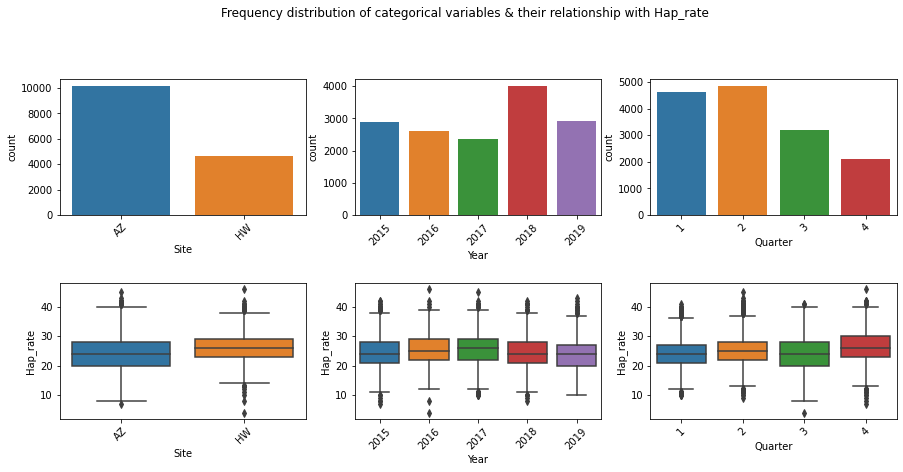

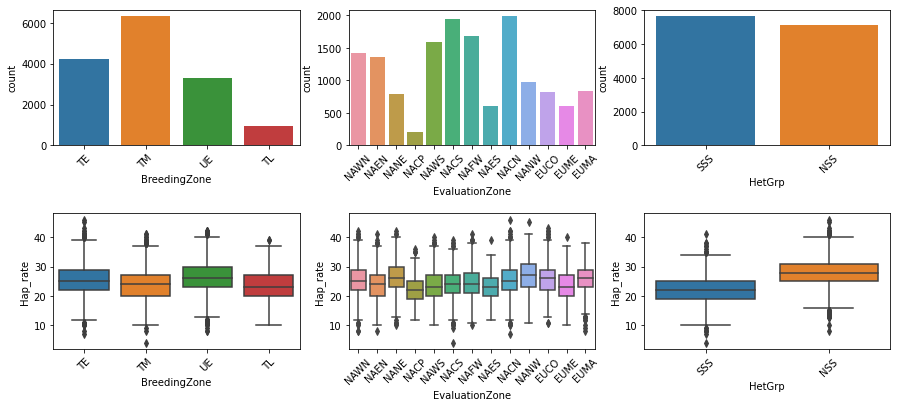

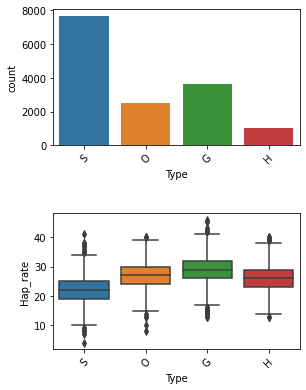

In [11]:
ix = 1
fig = plt.figure(figsize = (15,10))
fig.suptitle('Frequency distribution of categorical variables & their relationship with Hap_rate', Fontsize=30)
fig.subplots_adjust(hspace=.5)
for c in list(cat_fea.columns):
    if ix <= 3:
        if c != 'Hap_rate':
            ax1 = fig.add_subplot(3,3,ix)
            sns.countplot(data = cat_fea, x=c, ax = ax1)
            plt.xticks(rotation=45)
            
            ax2 = fig.add_subplot(3,3,ix+3)
            sns.boxplot(data=cat_fea, x=c, y='Hap_rate', ax=ax2)
            plt.xticks(rotation=45)
            #sns.violinplot(data=cat_fea, x=c, y='Hap_rate', ax=ax2)
            #sns.swarmplot(data = cat_fea, x=c, y ='Hap_rate', color = 'k', alpha = 0.4, ax=ax2)
    fig.subplots_adjust(hspace=.5)  # adjust space between subplots      
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

## Plots above indicate that variation exist among categorical features (Site, BreedingZone, EvaluationZone,HetGrp,Type, Year and Quarter) for Hap_rate; all these features needs to be included in the analysis as predictors.





# 3.1.3 Frequency distribution of combination of categorical features, 




C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 0.98, 'Distribution Of Experiments')

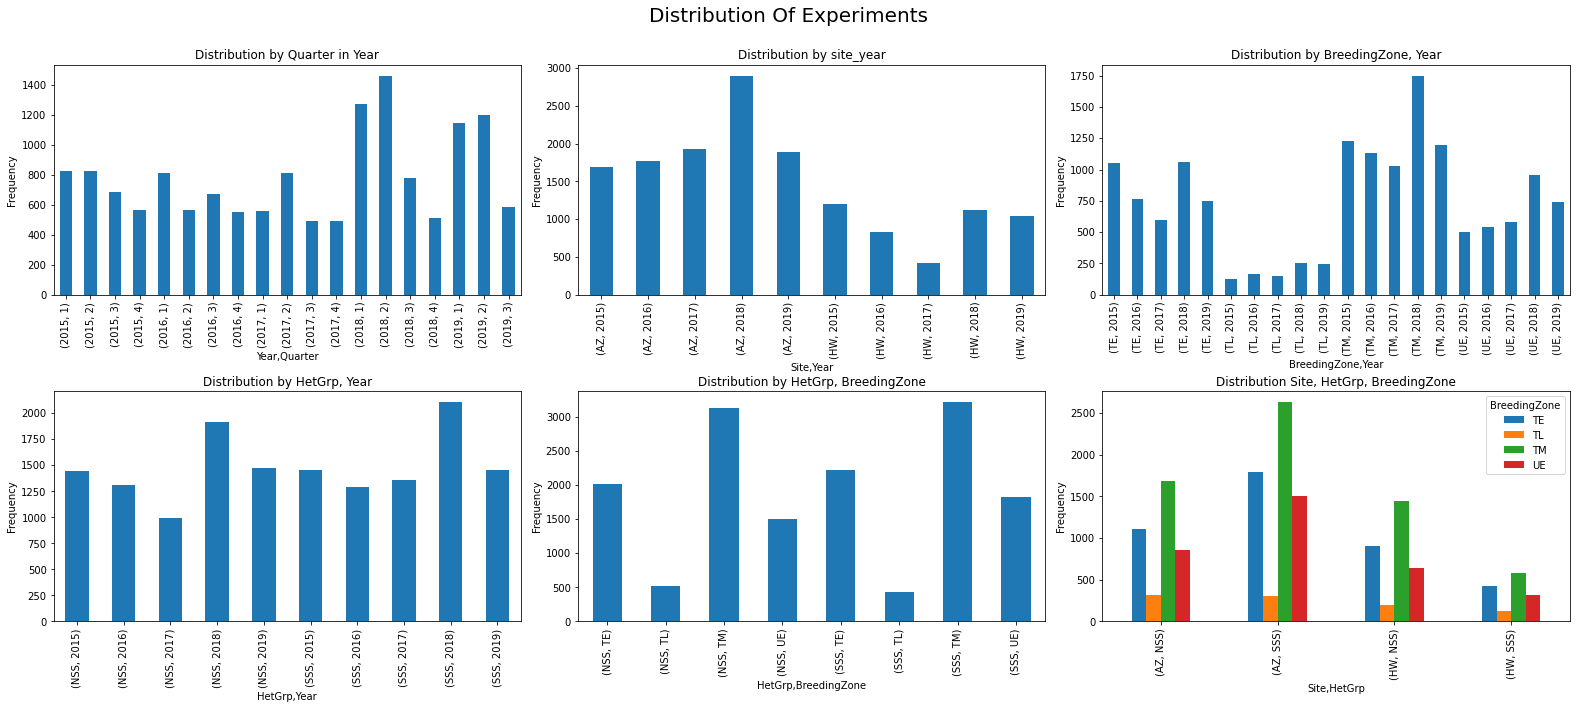

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(22,10))

#Distribution Of Experiments By Quarter And Year
year_quarter=data.groupby(["Year", "Quarter"]).size()
#print(year_quarter)
year_quarter.plot(ax=ax[0,0], kind='bar')
ax[0,0].set_title('Distribution by Quarter in Year')
ax[0,0].set_ylabel('Frequency')

#Distribution Of Experiments By Site And Year
site_year=data.groupby(["Site", "Year"]).size()
#print(site_year)
site_year.plot(ax=ax[0,1], kind='bar')
ax[0,1].set_title('Distribution by site_year')
ax[0,1].set_ylabel('Frequency')

#Distribution Of Experiments By BreedingZone And Year
BreedingZone_year=data.groupby(["BreedingZone", "Year"]).size()
#print(BreedingZone_year)
BreedingZone_year.plot(ax=ax[0,2], kind='bar')
ax[0,2].set_title('Distribution by BreedingZone, Year')
ax[0,2].set_ylabel('Frequency')

#Distribution Of Experiments By HetGrp And Year
HetGrp_year=data.groupby(["HetGrp", "Year"]).size()
#print(HetGrp_year)
HetGrp_year.plot(ax=ax[1,0], kind='bar')
ax[1,0].set_title('Distribution by HetGrp, Year')
ax[1,0].set_ylabel('Frequency')

#Distribution of experiments by HetGrp, BreedingZone
HetGrp_BreedingZone=data.groupby(["HetGrp", "BreedingZone"]).size()
#print(HetGrp_BreedingZone)

HetGrp_BreedingZone.plot(ax=ax[1,1], kind='bar')
ax[1,1].set_title('Distribution by HetGrp, BreedingZone')
ax[1,1].set_ylabel('Frequency')

## Distribution of experiments by Site, HetGrp, BreedingZone
Site_HetGrp_BreedingZone=pd.crosstab([data.Site, data.HetGrp],data.BreedingZone, margins=True)
#print(Site_HetGrp_BreedingZone)
SHB_group=Site_HetGrp_BreedingZone.iloc[:4,:4]
#print(SHB_group)
SHB_group.plot(ax=ax[1,2], kind='bar')
ax[1,2].set_title('Distribution Site, HetGrp, BreedingZone')
ax[1,2].set_ylabel('Frequency')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5)  
plt.tight_layout()
plt.subplots_adjust(top=0.90)
# Overall title of the figure, fontsize                              
fig.suptitle('Distribution Of Experiments', fontsize=20)

## variation exist among categorical feature combinations for number of experiments producing haploids

## 












## 3.1.4 Checking if each of catogical variables/combination is good predictor of Hap_rate? 
Distribution Of haploid_rate for each of the catogorical variables: i.e by site,by hetgroup,by year,by quater, by breeding zone

Text(0.5, 0.98, 'One way box plots')

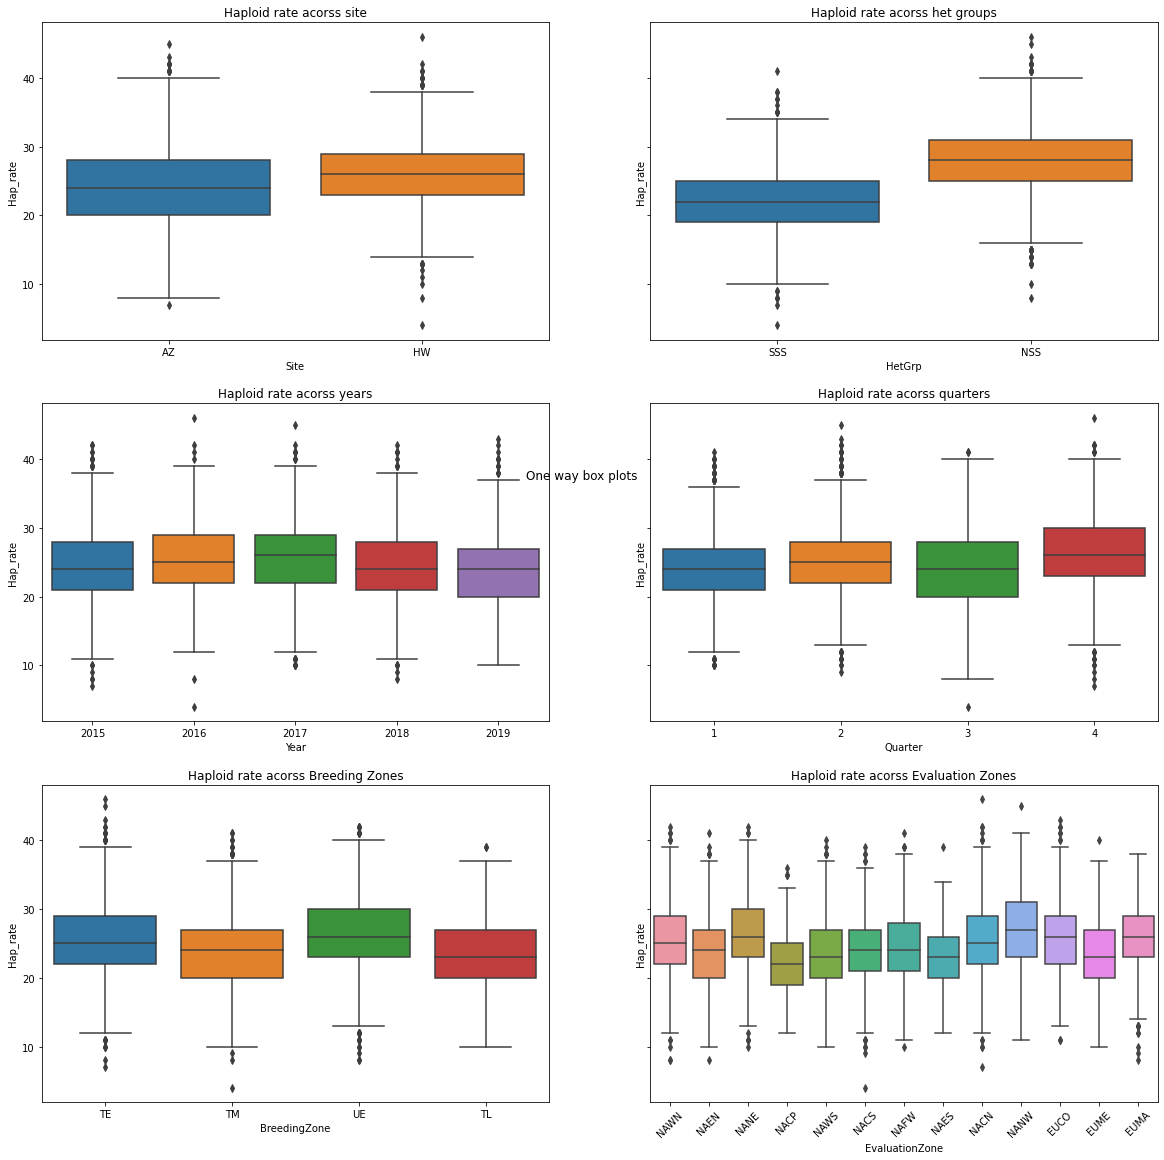

In [215]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10), sharey=True) # subplots with 2 rows, 3 columns by sharing y-axis
plt.subplots_adjust(bottom = 0.1, top = 1.6) # adjust subplot bottom and top sizes
plt.xticks(rotation=45) # rotate x-axis labels

# Site
sns.boxplot(ax=axes[0,0], x=data.Site, y=data.Hap_rate)
axes[0,0].set_title('Haploid rate acorss site')

# HetGroup
sns.boxplot(ax=axes[0,1], x=data.HetGrp, y=data.Hap_rate)
axes[0,1].set_title('Haploid rate acorss het groups')

# Year
sns.boxplot(ax=axes[1,0], x=data.Year, y=data.Hap_rate)
axes[1,0].set_title('Haploid rate acorss years')

# Quarters
sns.boxplot(ax=axes[1,1], x=data.Quarter, y=data.Hap_rate)
axes[1,1].set_title('Haploid rate acorss quarters')

# Breeding Zones
sns.boxplot(ax=axes[2,0], x=data.BreedingZone, y=data.Hap_rate)
axes[2,0].set_title('Haploid rate acorss Breeding Zones')

# Evaluation Zones
sns.boxplot(ax=axes[2,1], x=data.EvaluationZone, y=data.Hap_rate)
axes[2,1].set_title('Haploid rate acorss Evaluation Zones')

fig.suptitle('One way box plots')

## 3.1.5 two way box plots

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Two way box plots')

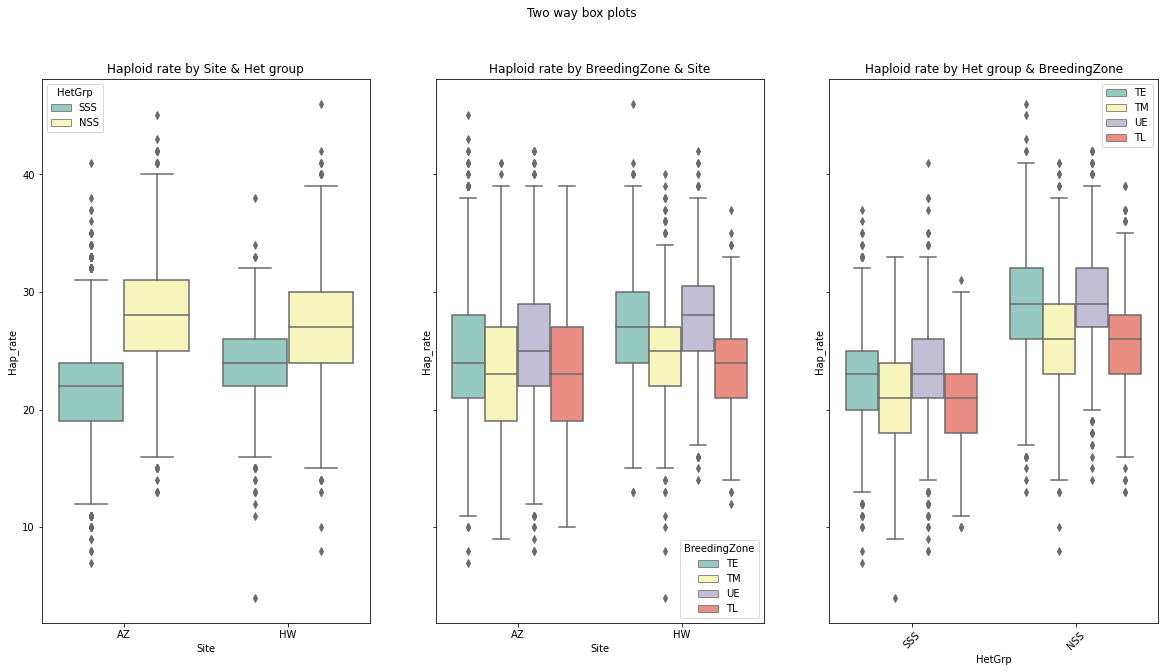

In [216]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True) # subplots with 2 rows, 3 columns by sharing y-axis
#plt.subplots_adjust(bottom = 0.1, top = 1.6) # adjust subplot bottom and top sizes
plt.xticks(rotation=45) # rotate x-axis labels

# Haprate by HetGrp,Site  
sns.boxplot(ax=axes[0], x='Site', y="Hap_rate", hue='HetGrp', data=data, palette="Set3")
#sns.boxplot(ax=axes[0], x='HetGrp', y="Hap_rate", hue='Site', data=data, palette="Set3")
plt.legend(loc='upper left')
axes[0].set_title('Haploid rate by Site & Het group')

# Haprate by Site, BreedingZone
sns.boxplot(ax=axes[1], x='Site', y="Hap_rate", hue='BreedingZone', data=data, palette="Set3")
plt.legend(loc='upper right')
axes[1].set_title('Haploid rate by BreedingZone & Site')

# Haprate by Het group, BreedingZone
sns.boxplot(ax=axes[2], x='HetGrp', y="Hap_rate", hue='BreedingZone', data=data, palette="Set3")
plt.legend(loc='upper right')
axes[2].set_title('Haploid rate by Het group & BreedingZone')


fig.suptitle('Two way box plots')

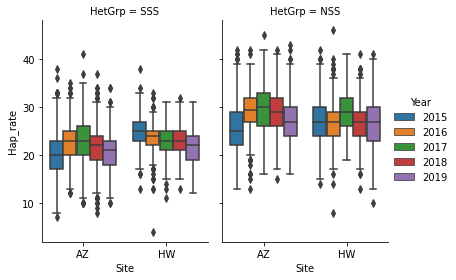

In [40]:
# haploid rate by site for each het group across years (y=hap_rate, X =AZ, HW; group_by and color/hue by het gorup); no specific interaction bet site and het grou
sns.catplot(x="Site", y="Hap_rate",
                hue="Year", col="HetGrp",
                data=data, kind="box",
                height=4, aspect=.7);

# Summary: All categorical variables (Site, BreedingZone,EvaluationZone,	HetGrp,Type, Year, Qaurter) seems to be predictive of Target variable: Hap_rate because distinct subcatogaries/groups had varied Hap_rates.

# 3.1.6 ANOVA to find out the significance of categorical variables with the target variable(Hap_rate)

In [218]:
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

y='Hap_rate'
x=['Site','BreedingZone','EvaluationZone','HetGrp','Type','Year','Quarter']

for i in x:
    #print(i)
    model=smf.ols(y + '~'+ i, data=cat_fea).fit()
    table = sm.stats.anova_lm(model)
    p=table["PR(>F)"][0]
    coeff,p= None, round(p,3)
    conclusion= "Correlated" if p<0.05 else "Non-correlated"
    print("Anova F: the variables,", i, "and Hap_rate are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables, Site and Hap_rate are Correlated (p-value: 0.0)
Anova F: the variables, BreedingZone and Hap_rate are Correlated (p-value: 0.0)
Anova F: the variables, EvaluationZone and Hap_rate are Correlated (p-value: 0.0)
Anova F: the variables, HetGrp and Hap_rate are Correlated (p-value: 0.0)
Anova F: the variables, Type and Hap_rate are Correlated (p-value: 0.0)
Anova F: the variables, Year and Hap_rate are Correlated (p-value: 0.0)
Anova F: the variables, Quarter and Hap_rate are Correlated (p-value: 0.0)


# ANOVA summary: Since the p-value <0.05 null hypothesis of samples means equality is rejected. So, all the categorical variables could be predictors of target variable (Hap_rate)




##########################################

##                                    










# 3.2 Numerical features

In [219]:
#Use 'select_dtypes` method to select columns of dtype 'object'
num_fea=data.select_dtypes(exclude='object').copy()
num_fea.head()

,Request_id,GE_ID,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,178950,67133087,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,178955,67133419,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,178969,67226512,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,178971,67226501,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,178973,67226717,5360,1277,24,623.0,516.0,83.0,286.0,55.0


# 3.2.1 Summary statistics of numerical features

In [220]:
# `describe` method for a statistical summary of the numerical columns
num_fea.describe().T

,count,mean,std,min,25%,50%,75%,max
Request_id,14811.0,1.663100e+05,8.154024e+04,7.0,183283.5,198042.0,217665.5,235448.0
GE_ID,14811.0,8.646820e+07,1.280163e+07,22627369.0,76594267.0,87797928.0,95853728.5,115611128.0
Actual_embryos,14811.0,4.140603e+03,1.850942e+03,7.0,2900.0,3998.0,5082.5,20902.0
Actual_haploid_embryos,14811.0,1.004846e+03,4.637097e+02,2.0,688.0,948.0,1231.0,5495.0
Hap_rate,14811.0,2.472831e+01,5.157249e+00,4.0,21.0,25.0,28.0,46.0
Actual_Elle_pots,14811.0,5.580673e+02,3.221798e+02,1.0,340.0,514.0,711.0,3797.0
Actual_D0_plants,14811.0,4.494825e+02,2.818682e+02,1.0,259.0,400.0,576.0,3768.0
Trans_rate,14811.0,7.978995e+01,1.485669e+01,1.0,71.0,82.0,92.0,100.0
Actual_D0_poll,14811.0,2.351344e+02,1.532730e+02,1.0,128.0,204.0,305.5,2201.0
Poll_rate,14811.0,5.411282e+01,1.629610e+01,0.0,43.0,55.0,66.0,100.0


## Numerical features Observations: 
1. Request_id, GE_ID are unique values of experiment and GE source of Haploids respectively. 

2. On average, out of ~4k embryos tried for haploid production, 948 haploid_embroys were generated with an avg hap_rate of 25.
        - Actual_embryos column had broad range 7 to 20902 (check if any possible outliers )
        - similarly, Actual_haploid_embryos had range 2-5495 with an average of 948.
        - Haploid_rate had range of 4-46 with an average of 25. 
        - Similarly, few other columns (Actual_Elle_pots, Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate) had broad range. 
Check if any potential outliers and if these columns had any realtion with Target variable: Hap_rate?

# 3.3.2 Distribution of Numerical features (univariate plots)

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


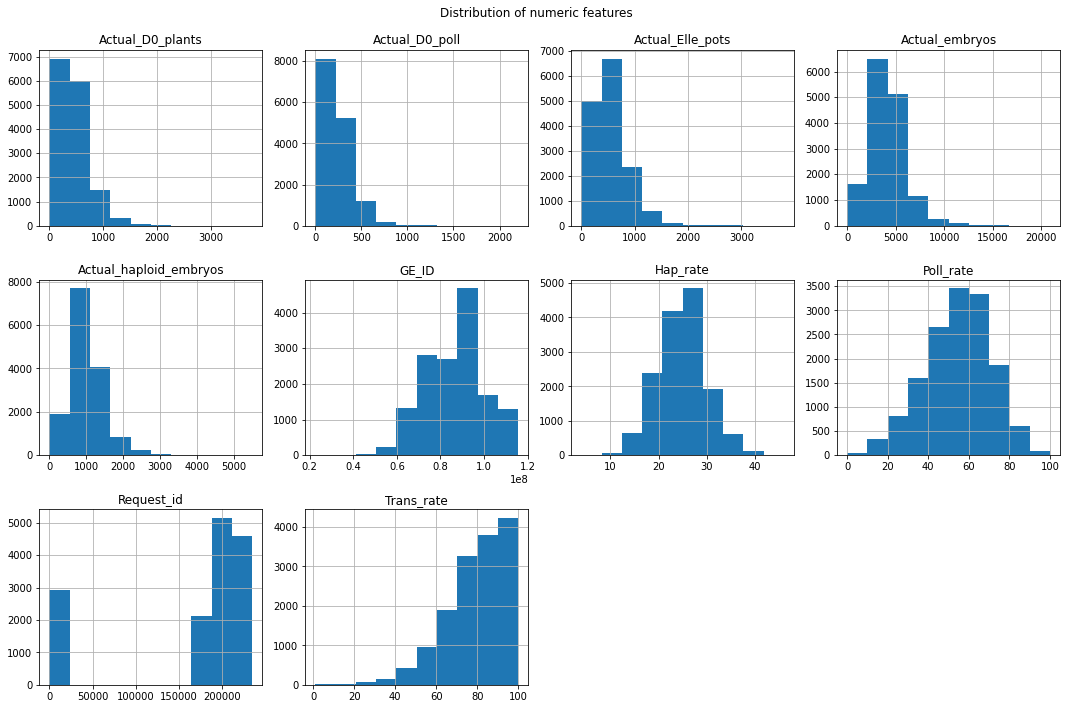

In [221]:
num_fea.hist(layout=(3,4), figsize=(15,10))
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=1.0)      

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
plt.tight_layout()
plt.suptitle('Distribution of numeric features', Fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()


## Distributions show that most of the numeric features seem skewed

# 3.2.3 Bivariate plots 

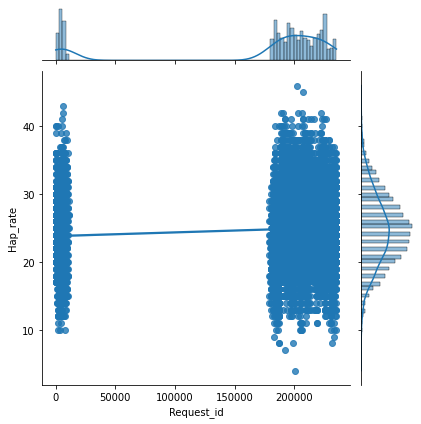

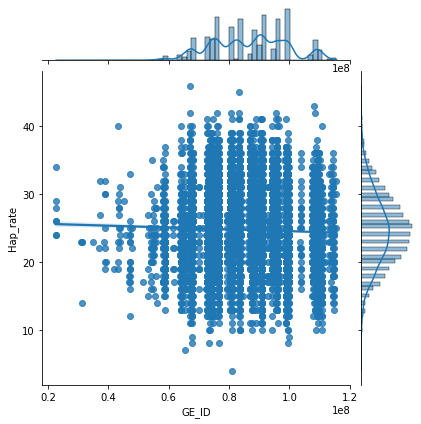

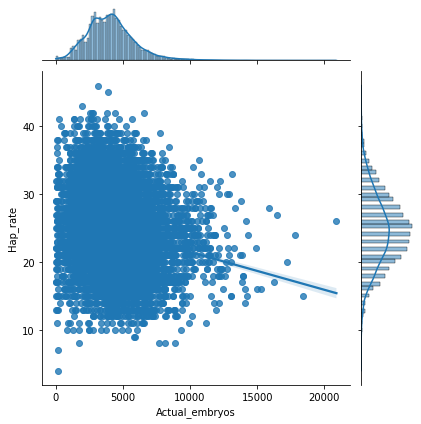

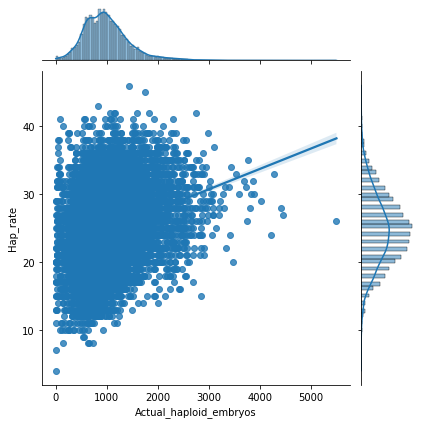

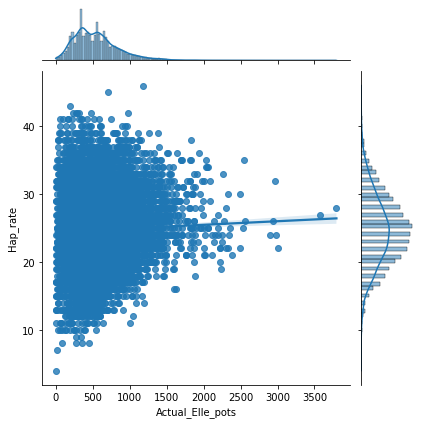

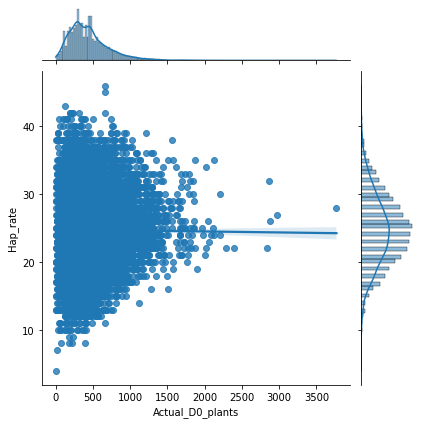

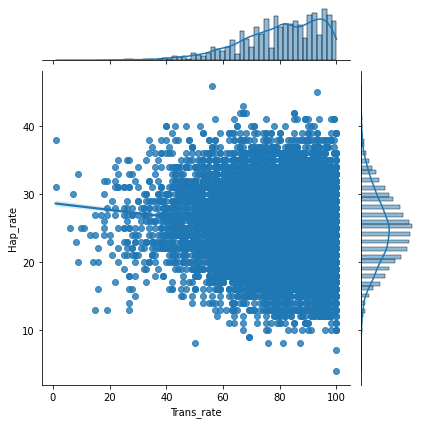

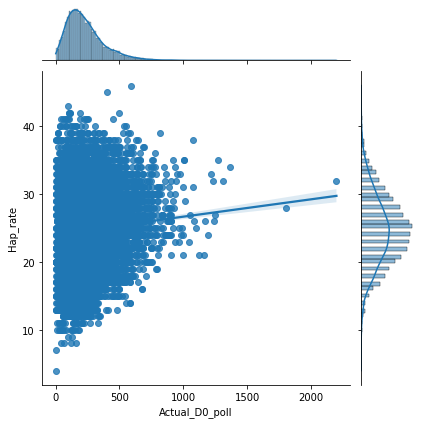

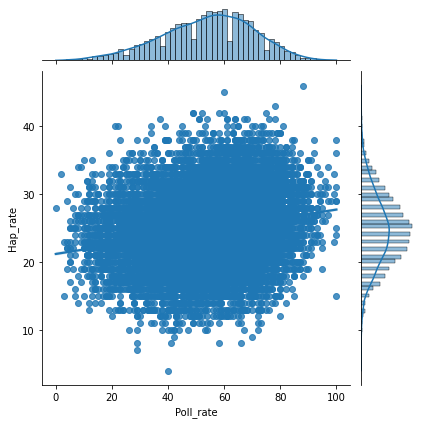

In [222]:
x=['Request_id','GE_ID','Actual_embryos','Actual_haploid_embryos','Actual_Elle_pots','Actual_D0_plants','Trans_rate','Actual_D0_poll','Poll_rate']
y='Hap_rate'
for i in x:
    sns.jointplot(x=i, y=y, data=num_fea, dropna=True, kind='reg')

### Bivariate plots of numeric columns shows no correlation between features and target variable.

# 3.2.4 Statistical analysis (Pearson correlation coefficents)


In [223]:
x, y= 'Actual_embryos', 'Hap_rate'

data_noNan=data[data[x].notnull()]
coeff, p=scipy.stats.pearsonr(data_noNan[x], data_noNan[y])
coeff, p=round(coeff, 3),round(p,3)
conclusion='Significant' if p<0.05 else 'Non-Significant'
print("Pearson Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Pearson Correlation: -0.199 Significant (p-value:0.0)


In [224]:
x=['Request_id','GE_ID','Actual_embryos','Actual_haploid_embryos','Actual_Elle_pots','Actual_D0_plants','Trans_rate','Actual_D0_poll','Poll_rate']
y='Hap_rate'

for i in x:
    data_noNan=data[data[i].notnull()]
    coeff, p=scipy.stats.pearsonr(data_noNan[i], data_noNan[y])
    coeff, p=round(coeff, 3),round(p,3)
    conclusion='Significant' if p<0.05 else 'Non-Significant'
    print("Pearson Correlation between", i, "and Hap_rate is:", coeff,',', conclusion, "(p-value:"+str(p)+")")

Pearson Correlation between Request_id and Hap_rate is: 0.086 , Significant (p-value:0.0)
Pearson Correlation between GE_ID and Hap_rate is: -0.033 , Significant (p-value:0.0)
Pearson Correlation between Actual_embryos and Hap_rate is: -0.199 , Significant (p-value:0.0)
Pearson Correlation between Actual_haploid_embryos and Hap_rate is: 0.27 , Significant (p-value:0.0)
Pearson Correlation between Actual_Elle_pots and Hap_rate is: 0.033 , Significant (p-value:0.0)
Pearson Correlation between Actual_D0_plants and Hap_rate is: -0.008 , Non-Significant (p-value:0.337)
Pearson Correlation between Trans_rate and Hap_rate is: -0.142 , Significant (p-value:0.0)
Pearson Correlation between Actual_D0_poll and Hap_rate is: 0.076 , Significant (p-value:0.0)
Pearson Correlation between Poll_rate and Hap_rate is: 0.207 , Significant (p-value:0.0)


## Most of the features had significant correlation with Hap_rate except Actual_D0_plants

In [41]:
data.to_csv('C:/Users/gellima/Desktop/Springboard_DScience/Data_Sci_Inhouse/data_EDA.csv', index=None)

In [43]:
new_data=pd.read_csv('data_EDA.csv')
new_data.shape

(14811, 17)

In [44]:
new_data.head()

,Site,Request_id,Year,Quarter,GE_ID,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,AZ,178950,2015,1,67133087,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,AZ,178955,2015,1,67133419,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,AZ,178969,2015,1,67226512,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,AZ,178971,2015,1,67226501,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,AZ,178973,2015,1,67226717,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0
